<h5> 0. 라이브러리 가져오기 </h5>

In [1]:
import pandas as pd
import os
import json
import sys
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from PIL import Image
import cv2
%matplotlib inline

import torch
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn


/home/changsu/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h3> 1. 데이터 로드 </h3>

In [2]:
# data load
os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from src.model.MCAoAN_vgg19 import MCAoAN
from src.utils.vocab_dict import VocabDict
import json

qst_vocab_path = "../datasets/vocab_questions.txt"
ans_vocab_path = "../datasets/vocab_answers.txt"

qst_vocab = VocabDict(qst_vocab_path)
ans_vocab = VocabDict(ans_vocab_path)

qst_vocab_size = qst_vocab.vocab_size
ans_vocab_size = ans_vocab.vocab_size

val_annotation_data = json.load(open(os.path.join('..', 'datasets', 'Annotations', 'v2_mscoco_val2014_annotations.json')))
val_annotation = pd.DataFrame(val_annotation_data["annotations"])
val_question_data = json.load(open(os.path.join('..', 'datasets', 'Questions', 'v2_OpenEnded_mscoco_val2014_questions.json')))
val_question = pd.DataFrame(val_question_data["questions"])

print(f"question num: {val_question.size}")

question num: 643062


<h5> 모델 로드</h5>

In [3]:
device = torch.device("cpu")

rcnn_model = fasterrcnn_resnet50_fpn(pretrained=True)
rcnn_model.roi_heads.nms_thresh = 0.7
rcnn_model.eval().to(device)

print("faster rcnn load done!")

faster rcnn load done!


In [4]:
PATH = '../models/MCAoAN_vgg19_img10_emb64-epoch-13.ckpt'
mcaoan_model = MCAoAN(
    ans_vocab_size= ans_vocab_size,
    qst_vocab_size= qst_vocab_size,
    dropout_rate= 0.5,
    embed_size=64,
).to(device)
mcaoan_model.load_state_dict(torch.load(os.path.join(PATH))["model_state_dict"])
mcaoan_model.eval()

print('mcaoan model load done!')

mcaoan model load done!


<h5> See Attention </h5>


question attention: what(0.00) country(0.49) is(0.42) this(0.03) ?(0.05)
our_ans: usa
expected_ans: ['japan', 'china', 'china', 'japan', 'japan', 'japan', 'japan', 'japan', 'china', 'japanese']
['0.80', '0.20']


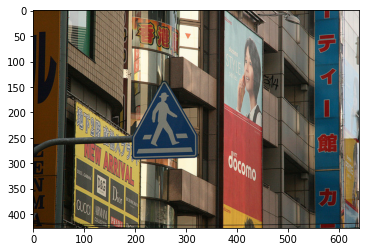

idx: 150100, frcnn 개수: 2


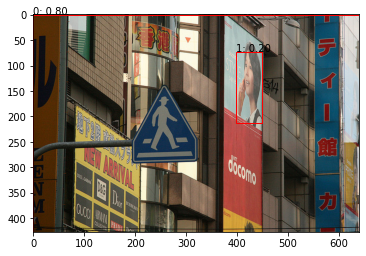

0.80


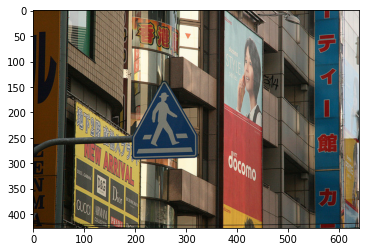

question attention: what(0.00) kind(0.01) of(0.00) sign(0.40) is(0.33) on(0.12) the(0.02) pole(0.09) ?(0.03)
our_ans: street
expected_ans: ['informational', 'pedestrian crossing', 'crosswalk', 'walk', 'crossing', 'walk', 'pedestrian sign', 'walking', 'walking', 'traffic']
['0.84', '0.16']


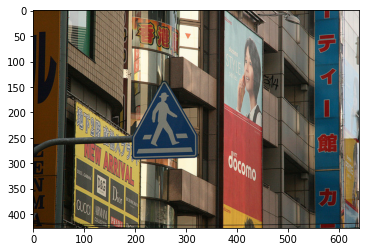

idx: 150101, frcnn 개수: 2


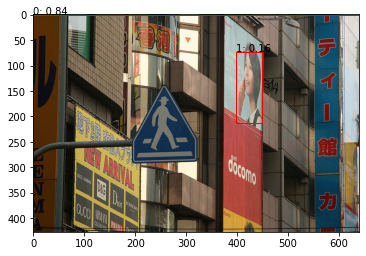

0.84


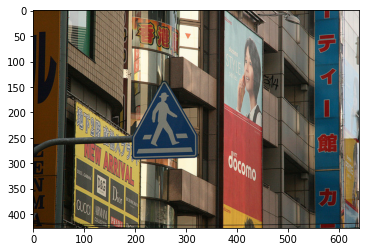

question attention: what(0.00) is(0.00) the(0.00) man(0.02) doing(0.23) on(0.20) the(0.14) sing(0.20) ?(0.20)
our_ans: talking
expected_ans: ['walking', 'walking', 'walking', 'crossing street', 'walking', 'walking', 'no man', 'walking', 'walking', 'walking']
['0.70', '0.30']


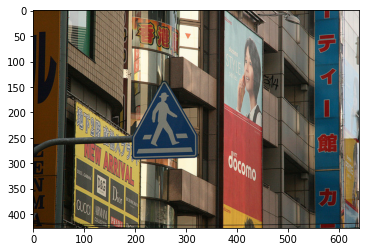

idx: 150102, frcnn 개수: 2


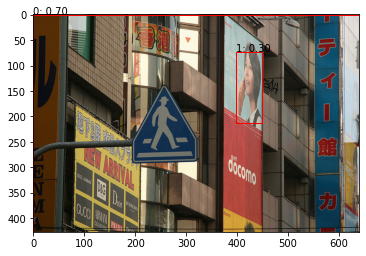

0.70


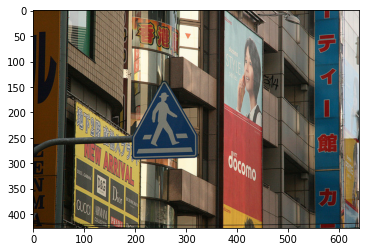

question attention: what(0.01) type(0.01) of(0.01) dog(0.40) is(0.36) this(0.10) ?(0.12)
our_ans: terrier
expected_ans: ['lassie', 'collie', 'collie', 'collie', 'normal', 'collie', 'collie', 'collie', 'coley', 'collie']
['0.45', '0.22', '0.09', '0.08', '0.04', '0.04', '0.03', '0.01', '0.01', '0.01', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']


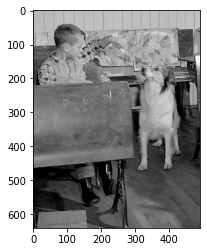

idx: 150103, frcnn 개수: 27


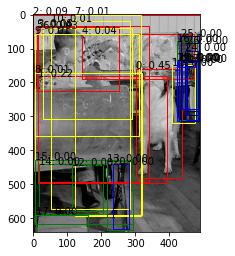

0.45


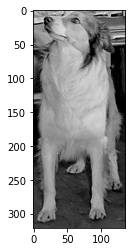

0.22


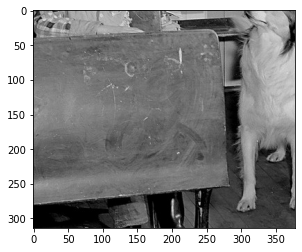

0.09


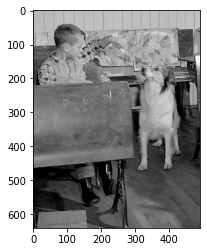

0.08


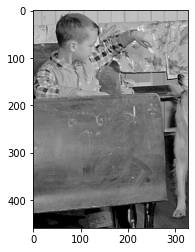

0.04


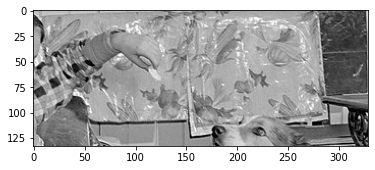

question attention: is(0.19) the(0.06) boy(0.05) feeding(0.28) the(0.12) dog(0.16) ?(0.14)
our_ans: no
expected_ans: ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']
['0.16', '0.14', '0.11', '0.10', '0.09', '0.08', '0.04', '0.04', '0.03', '0.03', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.00', '0.00']


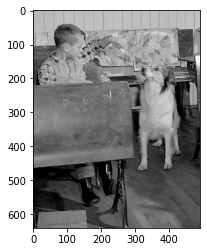

idx: 150104, frcnn 개수: 27


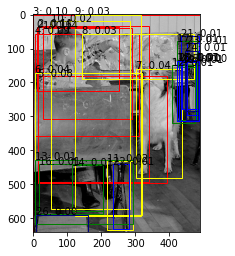

0.16


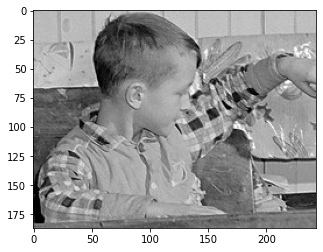

0.14


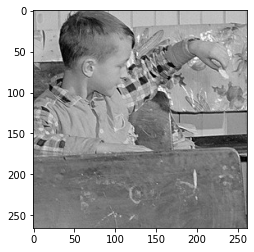

0.11


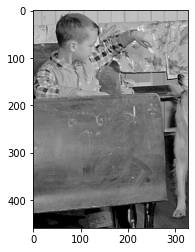

0.10


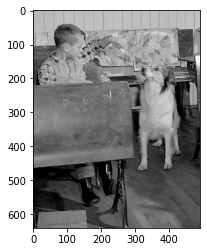

0.09


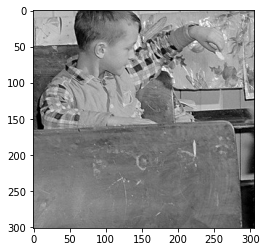

0.08


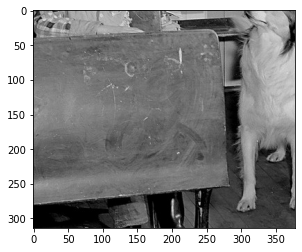

question attention: is(0.23) this(0.18) picture(0.18) colorful(0.20) ?(0.22)
our_ans: no
expected_ans: ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
['0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.03', '0.03', '0.03', '0.03']


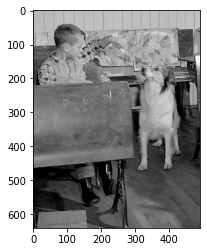

idx: 150105, frcnn 개수: 27


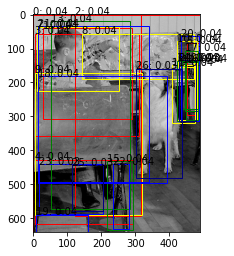

0.04


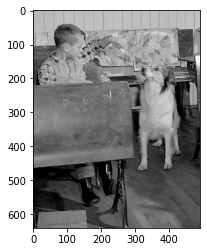

question attention: is(0.10) the(0.05) palm(0.09) tree(0.13) higher(0.14) than(0.11) the(0.07) traffic(0.10) light(0.10) ?(0.10)
our_ans: yes
expected_ans: ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']
['0.53', '0.47']


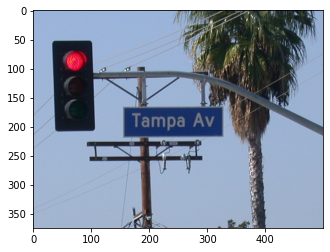

idx: 150106, frcnn 개수: 2


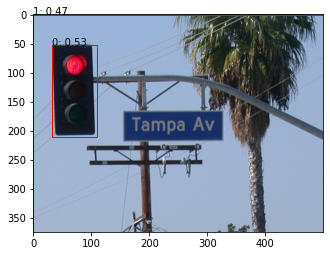

question attention: what(0.01) letter(0.55) does(0.14) the(0.02) red(0.01) light(0.01) look(0.07) like(0.08) ?(0.11)
our_ans: t
expected_ans: ['o', 'o', 'o', 'o', 'o', 'o', 'i', 'o', 'o', 'o']
['0.54', '0.46']


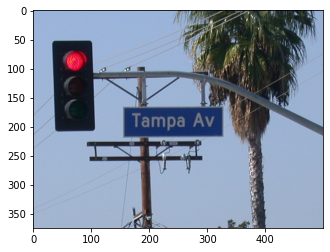

idx: 150107, frcnn 개수: 2


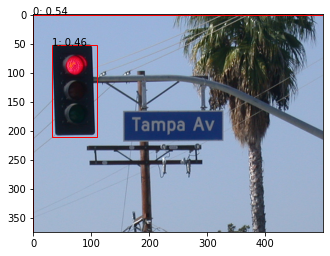

question attention: what(0.00) direction(0.15) is(0.11) the(0.07) traffic(0.13) light(0.12) indicating(0.27) ?(0.15)
our_ans: stop
expected_ans: ['stop', 'north', 'northbound', 'stop', 'straight', 'stop', 'stop', 'stop', 'stopped', 'stop']
['0.62', '0.38']


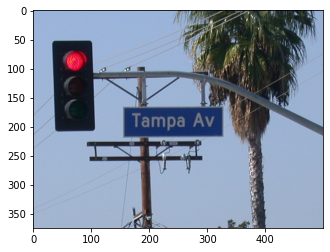

idx: 150108, frcnn 개수: 2


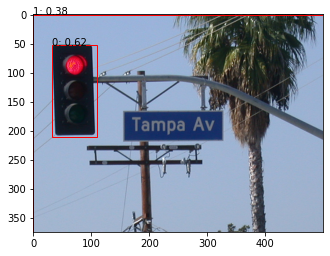

0.62


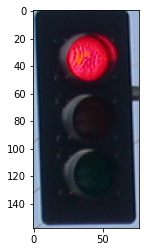

question attention: what(0.00) is(0.00) the(0.00) name(0.04) of(0.02) the(0.04) avenue(0.46) ?(0.44)
our_ans: <unk>
expected_ans: ['tampa', 'tampa', 'tampa', 'tampa av', 'tampa', 'tampa av', 'tampa', 'tampa av', 'tampa', 'tampa']
['0.54', '0.46']


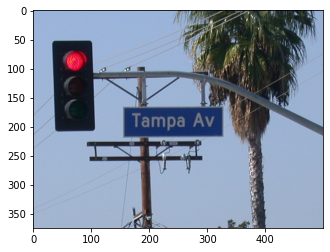

idx: 150109, frcnn 개수: 2


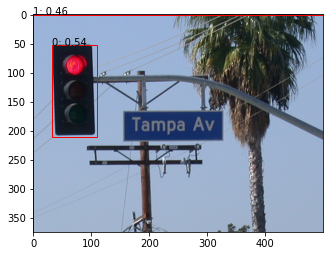

In [6]:
from src.utils import text_helper
normalize: transforms.Normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
)
max_qst_length = 30
max_sub_img_num = 30

print()

def extract_data(data_idx: int):
    idx_answers = pd.DataFrame(val_annotation.loc[data_idx, 'answers'])
    quest = val_annotation.loc[data_idx, 'question_id']
    question = val_question[val_question['question_id']==quest]['question'][data_idx]
    image_id = val_question[val_question['question_id']==quest]['image_id'][data_idx]
    
    return question, idx_answers, image_id

transform_without_normalize = transforms.Compose([
    transforms.ToTensor(),
])
def load_image_data(image_id: int, max_sub_img_num: int):
    image_rgb = Image.open(os.path.join('..','datasets','Images','val2014', f'COCO_val2014_{image_id:012}.jpg')).convert("RGB")
    print('..','datasets','Images','val2014', f'COCO_val2014_{image_id:012}.jpg')
    
    image_feat = torch.from_numpy(
            np.load(
                os.path.join('..','datasets','Image_Tensors','val2014', f'COCO_val2014_{image_id:012}.npy')
            )
        )[:max_sub_img_num, :].unsqueeze(0)
    score_thr = 0.2
    image_mask = torch.from_numpy(
        np.load(
            os.path.join('..','datasets','Image_Scores','val2014', f'COCO_val2014_{image_id:012}.npy')
        )
    )[:max_sub_img_num].unsqueeze(0)
    image_mask = image_mask < score_thr

    return image_feat, image_mask, image_rgb

def tokenize_question(question):
    quest_idx_list = np.array(
        [qst_vocab.word2idx("<pad>")] * max_qst_length
    )
    question_tokens = text_helper.tokenize(question)
    quest_idx_list[: len(question_tokens)] = [
        qst_vocab.word2idx(w) for w in question_tokens
    ]
    question_tokens = torch.tensor(quest_idx_list, dtype=torch.int64, device=device).unsqueeze(0)
    return question_tokens, quest_idx_list

idx_list = [
    10002,
    10015,
    10019,
    10025,
    10035,  
]
for idx in range(150100, 150110, 1):
    question, answers, image_id = extract_data(idx)
    image_feat, image_mask, image_rgb = load_image_data(image_id, max_sub_img_num)
    
    image_tensor = transform_without_normalize(image_rgb).unsqueeze(0).to(device)

    question_tokens, quest_idx_list = tokenize_question(question)
    res_rcnn = rcnn_model(image_tensor)
    res_MCAoAN = mcaoan_model.forward(image_feat, image_mask, question_tokens)
    
    vqa_ans = res_MCAoAN[0]
    qst_att = res_MCAoAN[2]
    img_att = res_MCAoAN[3]
    _, pred_exp = torch.max(vqa_ans, 1)
    ans = ans_vocab.idx2word(pred_exp)
    print("question attention: " + ' '.join([f"{qst_vocab.idx2word(quest_idx)}({qst_att[0][idx].item():.2f})" for idx, quest_idx in enumerate(quest_idx_list) if quest_idx > 0]))
    print(f"our_ans: {ans}")
    print(f"expected_ans: {answers['answer'].tolist()}")

    # process_attention
    imgs = [
        {
            "box": torch.Tensor([0, 0, image_tensor.shape[3], image_tensor.shape[2]]),
            "att": img_att[0][0]
        } 
    ] + [
        {
            "box": res_rcnn[0]["boxes"][i],
            "att": img_att[0][i + 1]
        } for i in range(0, max_sub_img_num - 1) if image_mask[0][i + 1] == False
    ]
    imgs = sorted(imgs, key=lambda x : x["att"].item(), reverse=True)

    color_dict = ['red']*6 + ['yellow'] * 6 + ['green'] * 6 + ['blue'] * 6 + ['navy'] * 6
    print ([
        f'{img["att"].item():.2f}'
        for img in imgs
    ])
    fig,ax = plt.subplots(1)
    ax.imshow(image_rgb)
    plt.show()

    fig,ax = plt.subplots(1)
    ax.imshow(image_rgb)
    print(f"idx: {idx}, frcnn 개수: {len(imgs)}")
    for idx, obj in enumerate(imgs):
        box = obj["box"]
        att = obj["att"]
        x1, y1, x2, y2 = int(box[0].item()), int(box[1].item()), int(box[2].item()), int(box[3].item())
        box_plot = Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor=color_dict[idx], linewidth=1)
        plt.text(x1, y1, f"{idx}: {att.item():.2f}")
        ax.add_patch(box_plot)
    plt.show()
    for idx, obj in enumerate(imgs):
        box = obj["box"]
        att = obj["att"]
        if att < 1.1 / len(imgs):
            continue
        if idx > 5:
            break
        x1, y1, x2, y2 = int(box[0].item()), int(box[1].item()), int(box[2].item()), int(box[3].item())
        fig, ax = plt.subplots(1)
        img_pil = Image.fromarray(np.array(image_rgb)[y1:y2,x1:x2,0:3])
        ax.imshow(img_pil)
        print(f"{att.item():.2f}")
        plt.show()